In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning);

import sys
sys.executable

'/home/mingrui/anaconda3/envs/py36_cu90/bin/python'

In [2]:
import os
import glob
import shutil
from random import shuffle

# plotting
import PIL
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15, 15]

import deephistopath.wsi.slide as slide

import py_wsi
import py_wsi.imagepy_toolkit as tk

from wsi_utils import multiprocessing_pipeline, file_stats, filter_slide_entropy

import pandas as pd
pd.set_option('display.max_columns',None)

In [3]:
of_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus'
of_db_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus'
of_db = 'out_of_focus_db'

turtle_of = py_wsi.Turtle(of_dir, of_dir, of_db)

1 WSI found in directory.


In [4]:
print("Total WSI images:    " + str(turtle_of.num_files))
print("LMDB name:           " + str(turtle_of.db_name))
print("File names:          " + str(turtle_of.files))

Total WSI images:    1
LMDB name:           out_of_focus_db
File names:          ['69248(8).svs']


Openslide info:

Level count: 4
Level dimensions: ((71711, 69481), (17927, 17370), (4481, 4342), (2240, 2171))
Level downsamples: (1.0, 4.000112457934451, 16.00271012230256, 32.008992420379016)
Dimensions: (71711, 69481)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=710x682 at 0x7F2B7017F128>
  macro: <PIL.Image.Image image mode=RGBA size=1600x616 at 0x7F2AC58075C0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=792x768 at 0x7F2AC58074A8>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: D794XS72
  Property: aperio.Date, value: 08/24/17
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 45
  Property: aperio.Filename, value: 91986
  Property: aperio.Focus Offset, value: -0.000500
  Property: aperio.ICC Profile, value: AT2
  Property: aperio.ImageID, value: 91986
  Property: aperio.Left, value: 19.705435
  Property

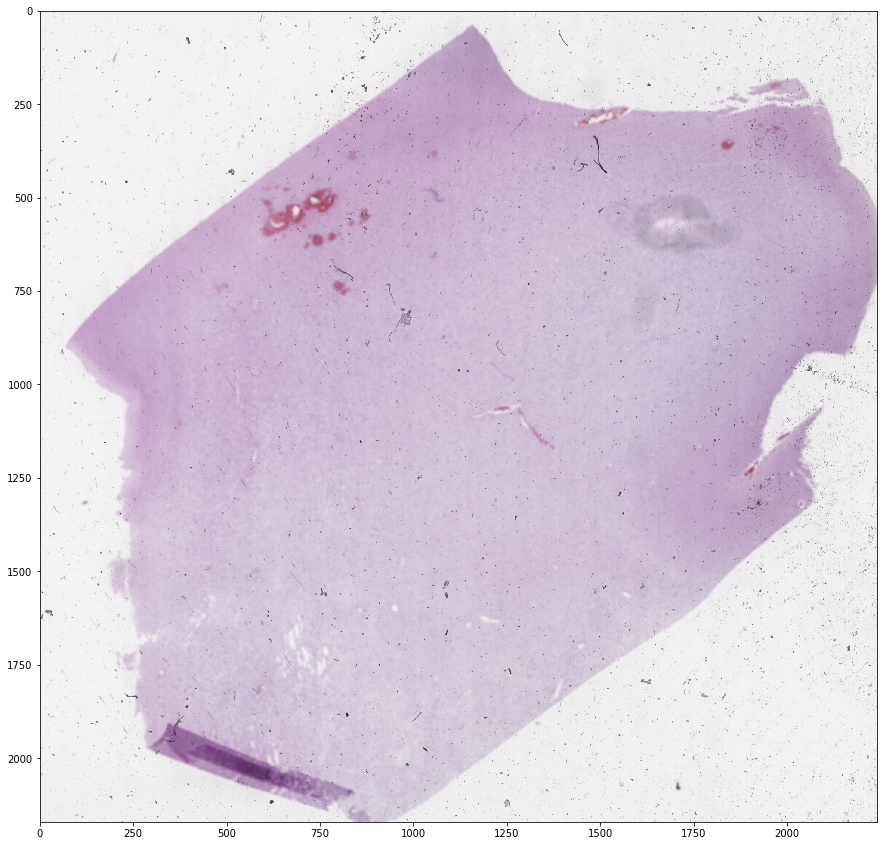

In [5]:
file_stats(of_dir, '69248(8).svs')

In [6]:
filter_slide_entropy(of_dir, turtle_of.files)

/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/69248(8).svs
Opening Slide #1: /media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/69248(8).svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
Saving image to: /media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/training_png/69248(8).svs-001-32x-71711x69481-2240x2171.png
Done converting slide 1
Time elapsed: 0:00:04.402716
Applying filters to images (multiprocess)

Processing slide #1
/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
RGB                  | Time: 0:00:00.221820  Type: uint8   Shape: (2171, 2240, 3)
Save Image           | Time: 0:00:02.546769  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/filter_png/69248(8).svs-001-001-rgb.png
Save Thumbnail       | Time:

In [7]:
low_entropy_csv = pd.read_csv('out-of-focus/low-entropy.csv')
low_entropy_csv.head()

,slides with low entropy
0,69248(8).svs


# DEAD CELLS

1 WSI found in directory.
Total WSI images:    1
LMDB name:           out_of_focus_db
File names:          ['1708-1.svs']
Openslide info:

Level count: 4
Level dimensions: ((63743, 55628), (15935, 13907), (3983, 3476), (1991, 1738))
Level downsamples: (1.0, 4.0000941324129276, 16.003609124741025, 32.011237276605485)
Dimensions: (63743, 55628)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=710x682 at 0x7F2AFA9D9E80>
  macro: <PIL.Image.Image image mode=RGBA size=1600x616 at 0x7F2AF225C390>
  thumbnail: <PIL.Image.Image image mode=RGBA size=880x768 at 0x7F2AF225C470>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: D794XS72
  Property: aperio.Date, value: 08/26/17
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 45
  Property: aperio.Filename, value: 92218
  Property: aperio.Focus Offset, value: -0.000500
  Property: 

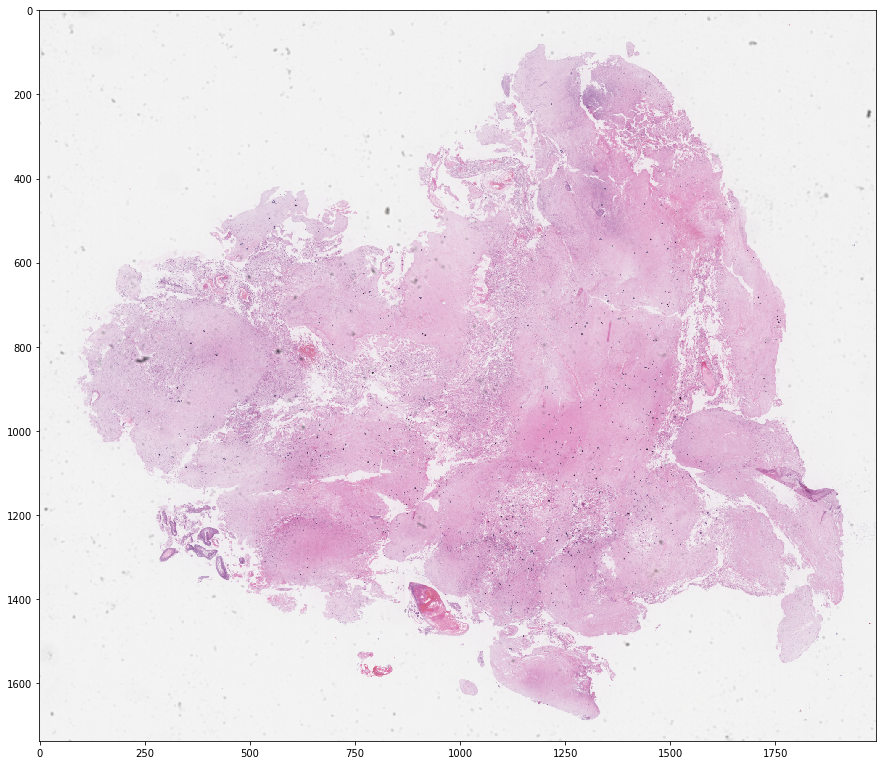

In [9]:
of_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells'
of_db_dir = of_dir
of_db = 'out_of_focus_db'

turtle_of = py_wsi.Turtle(of_dir, of_dir, of_db)

print("Total WSI images:    " + str(turtle_of.num_files))
print("LMDB name:           " + str(turtle_of.db_name))
print("File names:          " + str(turtle_of.files))

file_stats(of_dir, '1708-1.svs')

In [10]:
filter_slide_entropy(of_dir, turtle_of.files)

/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/1708-1.svs
Opening Slide #1: /media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/1708-1.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
Saving image to: /media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/training_png/1708-1.svs-001-32x-63743x55628-1991x1738.png
Done converting slide 1
Time elapsed: 0:00:02.749467
Applying filters to images (multiprocess)

Processing slide #1
/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
RGB                  | Time: 0:00:00.171502  Type: uint8   Shape: (1738, 1991, 3)
Save Image           | Time: 0:00:01.331596  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/filter_png/1708-1.svs-001-001-rgb.png
Save Thumbnail       | Time: 0:00:00.017049  Nam

In [11]:
low_entropy_csv = pd.read_csv('dead-cells/low-entropy.csv')
low_entropy_csv.head()

,slides with low entropy


# FROZEN

1 WSI found in directory.
Total WSI images:    1
LMDB name:           frozen_db
File names:          ['TCGA-RR-A6KA-01A-02-TSB.31351943-F118-4A01-B931-B38510510CAB.svs']
Openslide info:

Level count: 4
Level dimensions: ((81871, 31048), (20467, 7762), (5116, 1940), (2558, 970))
Level downsamples: (1.0, 4.000073288708653, 16.00352784472405, 32.0070556894481)
Dimensions: (81871, 31048)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=691x636 at 0x7F2AF2217DD8>
  macro: <PIL.Image.Image image mode=RGBA size=1600x629 at 0x7F2AF21FECC0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x388 at 0x7F2AF21FEDA0>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: resc3-dsr2
  Property: aperio.Date, value: 06/25/13
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 109
  Property: aperio.Filename, value: TCGA-RR-A6KA-01A-02-TS

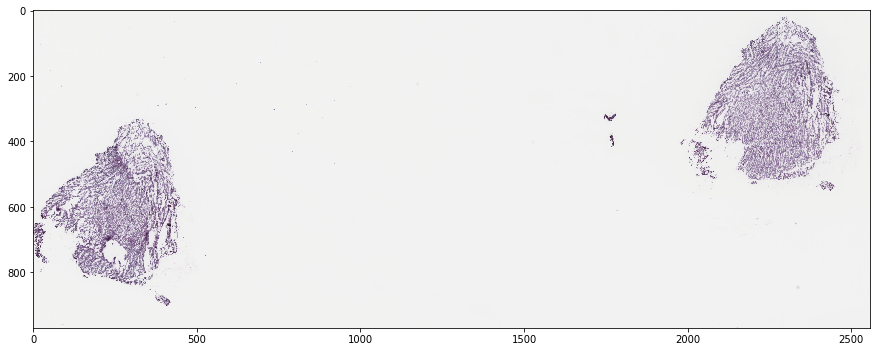

In [12]:
of_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/frozen'
of_db_dir = of_dir
of_db = 'frozen_db'

turtle_of = py_wsi.Turtle(of_dir, of_dir, of_db)

print("Total WSI images:    " + str(turtle_of.num_files))
print("LMDB name:           " + str(turtle_of.db_name))
print("File names:          " + str(turtle_of.files))

file_stats(of_dir, 'TCGA-RR-A6KA-01A-02-TSB.31351943-F118-4A01-B931-B38510510CAB.svs')

In [13]:
filter_slide_entropy(of_dir, turtle_of.files)

/media/disk1/mingrui-projects/python-wsi-preprocessing/frozen/TCGA-RR-A6KA-01A-02-TSB.31351943-F118-4A01-B931-B38510510CAB.svs
Opening Slide #1: /media/disk1/mingrui-projects/python-wsi-preprocessing/frozen/TCGA-RR-A6KA-01A-02-TSB.31351943-F118-4A01-B931-B38510510CAB.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/frozen
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
Saving image to: /media/disk1/mingrui-projects/python-wsi-preprocessing/frozen/training_png/TCGA-RR-A6KA-01A-02-TSB.31351943-F118-4A01-B931-B38510510CAB.svs-001-32x-81871x31048-2558x970.png
Done converting slide 1
Time elapsed: 0:00:01.715689
Applying filters to images (multiprocess)

Processing slide #1
RGB                  | Time: 0:00:00.079467  Type: uint8   Shape: (970, 2558, 3)
/media/disk1/mingrui-projects/python-wsi-preprocessing/frozen
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
Save Image           | Time: 0:00:00.200107  Name: /media/disk1

In [14]:
low_entropy_csv = pd.read_csv('frozen/low-entropy.csv')
low_entropy_csv.head()

,slides with low entropy
